# Stellar activity indexes

This notebook shows an example to calculate stellar activity indexes.

In [8]:
import spectrallib

First read a template product that contains the template spectrum and all individual spectra in the time series.

In [3]:
template_file = "/Volumes/Samsung_T5/Data/SOPHIE/TOI-1736/analysis/e2ds/TOI-1736_sophie_template.fits"
template = spectrallib.read_template_product(template_file)

## H-alpha

Extract fluxes within a certain spectral window and re-normalize data by a local continuum

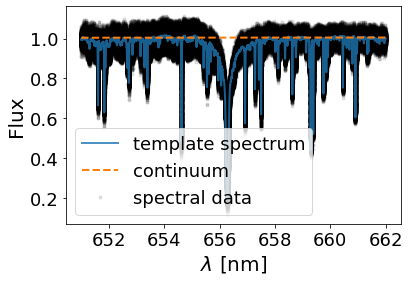

In [4]:
wlrange=[651,662]
cont_ranges=[[652,654.5],[659.5,661.5]]
wl, flux, fluxerr, fluxes, fluxerrs = spectrallib.extract_spectral_feature(template, wlrange=wlrange, cont_ranges=cont_ranges, polyn_order=1, plot=True)

START SPECTRAL ANALYS

In [5]:
# set index label
line_label="H-alpha"

# set line(s) center(s) and line(s) width(s) 
wl_lines = [656.28]
delta_wl_lines = [0.150]

# set continuum(a) center(s) and continuum(a) width(s)
wl_conts=[660.5]
delta_wl_conts=[2.0]

Calculate index in the template spectrum and generate some nice plots

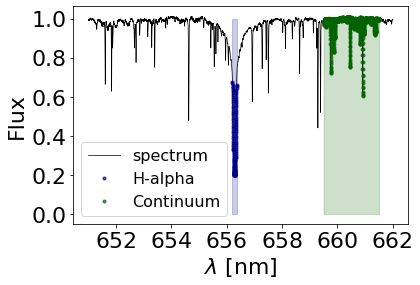

H-alpha index = 0.3739


In [6]:
template_halpha = spectrallib.activity_index(wl, flux, wl_lines=wl_lines, delta_wl_lines=delta_wl_lines, wl_conts=wl_conts, delta_wl_conts=delta_wl_conts, line_label=line_label, verbose=True, plot=True)

Calculate index using Monte Carlo

H-alpha index = 0.374 + 0.001 - 0.001 


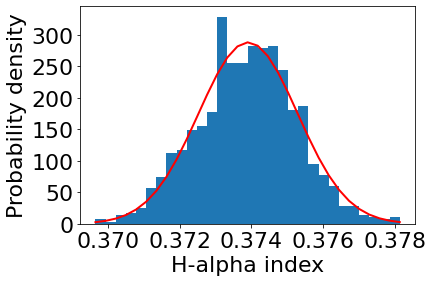

In [9]:
template_halpha, template_halphaerr = spectrallib.activity_index_montecarlo(wl, flux, fluxerr, wl_lines=wl_lines, delta_wl_lines=delta_wl_lines, wl_conts=wl_conts, delta_wl_conts=delta_wl_conts, nsamples=1000, line_label=line_label, verbose=True, plot=True)

Run the MC routine for all individual spectra to obtain the time series and (optionally) save it to an output file.

Spectrum 1/129 -> BJD = 2459081.61495904 H-alpha index = 0.3764 +/- 0.0016
Spectrum 2/129 -> BJD = 2459084.64339170 H-alpha index = 0.3728 +/- 0.0014
Spectrum 3/129 -> BJD = 2459085.62037517 H-alpha index = 0.3799 +/- 0.0014
Spectrum 4/129 -> BJD = 2459106.60979589 H-alpha index = 0.3763 +/- 0.0014
Spectrum 5/129 -> BJD = 2459107.65933976 H-alpha index = 0.3829 +/- 0.0013
Spectrum 6/129 -> BJD = 2459113.61605417 H-alpha index = 0.3782 +/- 0.0015
Spectrum 7/129 -> BJD = 2459138.53334588 H-alpha index = 0.3746 +/- 0.0012
Spectrum 8/129 -> BJD = 2459140.50963493 H-alpha index = 0.3756 +/- 0.0018
Spectrum 9/129 -> BJD = 2459141.47077479 H-alpha index = 0.3689 +/- 0.0014
Spectrum 10/129 -> BJD = 2459147.51261854 H-alpha index = 0.3795 +/- 0.0021
Spectrum 11/129 -> BJD = 2459149.47202788 H-alpha index = 0.3744 +/- 0.0017
Spectrum 12/129 -> BJD = 2459150.49656487 H-alpha index = 0.3801 +/- 0.0012
Spectrum 13/129 -> BJD = 2459151.39709220 H-alpha index = 0.3731 +/- 0.0020
Spectrum 14/129 -> BJ

Spectrum 109/129 -> BJD = 2459811.63296043 H-alpha index = 0.3759 +/- 0.0009
Spectrum 110/129 -> BJD = 2459813.61785438 H-alpha index = 0.3796 +/- 0.0011
Spectrum 111/129 -> BJD = 2459814.60410907 H-alpha index = 0.3744 +/- 0.0011
Spectrum 112/129 -> BJD = 2459815.59751712 H-alpha index = 0.3766 +/- 0.0009
Spectrum 113/129 -> BJD = 2459816.57867913 H-alpha index = 0.3779 +/- 0.0013
Spectrum 114/129 -> BJD = 2459824.60024501 H-alpha index = 0.3741 +/- 0.0008
Spectrum 115/129 -> BJD = 2459827.52971422 H-alpha index = 0.3791 +/- 0.0008
Spectrum 116/129 -> BJD = 2459837.66052363 H-alpha index = 0.3775 +/- 0.0011
Spectrum 117/129 -> BJD = 2459840.63717555 H-alpha index = 0.3784 +/- 0.0008
Spectrum 118/129 -> BJD = 2459860.50049989 H-alpha index = 0.3769 +/- 0.0010
Spectrum 119/129 -> BJD = 2459863.48807769 H-alpha index = 0.3805 +/- 0.0010
Spectrum 120/129 -> BJD = 2459864.45157289 H-alpha index = 0.3842 +/- 0.0021
Spectrum 121/129 -> BJD = 2459865.58127888 H-alpha index = 0.3774 +/- 0.0012

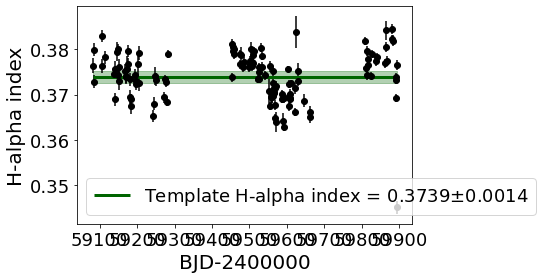

In [11]:
#output_timeseries = "/Volumes/Samsung_T5/Data/SOPHIE/TOI-1736/analysis/e2ds/TOI-1736_sophie_halpha.rdb"
output_timeseries = ''
times, halpha, halphaerr = spectrallib.activity_index_timeseries(wl, fluxes, fluxerrs, template["times"], wl_lines=wl_lines, delta_wl_lines=delta_wl_lines, wl_conts=wl_conts, delta_wl_conts=delta_wl_conts, nsamples=1000, line_label=line_label, output=output_timeseries, ref_index_value=template_halpha, ref_index_err=template_halphaerr, verbose=True, plot=True)